In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

Reading csv and transforming values

In [8]:
import os
os.getcwd()
os.chdir('C:\\Users\\Sony VAIO Pro\\Documents\\python_work')


In [9]:
#Read csv
df = pd.read_csv("blyads_prob.csv", encoding='cp1251')
print(df.columns)


Index(['metro', 'chas', 'dva_chasa', 'noch', 'ves', 'rost', 'vozrast',
       'razmer', 'vpopu'],
      dtype='object')


In [10]:
#Group by data type
df.columns.to_series().groupby(df.dtypes).groups

df['chas'] = pd.to_numeric(df['chas'], downcast='float', errors='coerce')
df['dva_chasa'] = pd.to_numeric(df['dva_chasa'], downcast='float', errors='coerce')
df['noch'] = pd.to_numeric(df['noch'], downcast='float', errors='coerce')
#df['ves'] = df['ves'].str[5:]
df['ves'] = pd.to_numeric(df['ves'], downcast='float', errors='coerce')
#df['rost'] = df['rost'].str[6:]
df['rost'] = pd.to_numeric(df['rost'], downcast='float', errors='coerce')
#df['vozrast'] = df['vozrast'].str[9:]
df['vozrast'] = pd.to_numeric(df['vozrast'], downcast='float', errors='coerce')
#df['razmer'] = df['razmer'].str[7:]
df['razmer'] = pd.to_numeric(df['razmer'], downcast='float', errors='coerce')
#df['vpopu'] = df['vpopu'].str[5:]

In [11]:

back = df['vpopu'].copy()
df = df.assign(backdoor=back)
#Replace extra prices with '1'
df['vpopu'][df['vpopu'] > 1] = 1
#if df.loc[:,('vpopu')]> 1:
#    df.loc[:,('vpopu')] = 1
    
df['backdoor'][0 == df['backdoor']] = 'nan'
df['backdoor'][1 == df['backdoor']] = '0'
df['backdoor'] = pd.to_numeric(df['backdoor'], downcast='float', errors='coerce')

df.chas.value_counts(normalize=False, sort=True,
                         ascending=False, bins=None, dropna=True)

df.vpopu
print(df.head())

                metro    chas  dva_chasa     noch   ves   rost  vozrast  \
0  Ленинский проспект  5000.0    10000.0      NaN  47.0  172.0     27.0   
1        Алексеевская  7000.0    14000.0  35000.0  45.0  168.0     27.0   
2            Одинцово  3000.0     6000.0  15000.0  62.0  170.0     20.0   
3         Шаболовская  8000.0    16000.0  40000.0  50.0  177.0     23.0   
4        Марксистская  6000.0    15000.0      NaN  67.0  175.0     34.0   

   razmer  vpopu  backdoor  
0     2.0      0       NaN  
1     4.0      0       NaN  
2     3.0      0       NaN  
3     3.0      1       0.0  
4     2.0      1    5000.0  


c:\users\sony vaio pro\anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\sony vaio pro\anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
corrmat2 = df.corr()
#f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2,linewidths=.1)


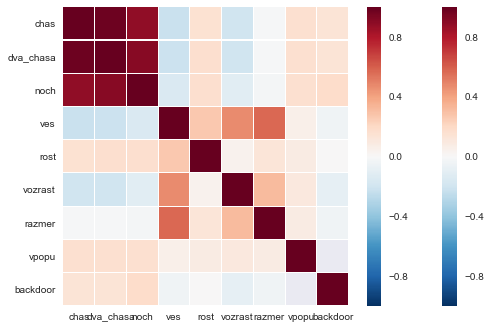

In [14]:
data = df.chas.dropna()
n, bins = np.histogram(data, 100)

plt.hist(data, bins='auto')

plt.show()